In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

 **Data Loading**

In [ ]:
df = pd.read_csv('/content/one-million-reddit-jokes.csv')
df.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,ftbp1i,2qh72,jokes,False,1585785543,https://old.reddit.com/r/Jokes/comments/ftbp1i...,self.jokes,NaN,My corona is covered with foreskin so it is no...,I am soooo glad I'm not circumcised!,2
1,post,ftboup,2qh72,jokes,False,1585785522,https://old.reddit.com/r/Jokes/comments/ftboup...,self.jokes,NaN,It's called Google Sheets.,Did you know Google now has a platform for rec...,9
2,post,ftbopj,2qh72,jokes,False,1585785508,https://old.reddit.com/r/Jokes/comments/ftbopj...,self.jokes,NaN,The vacuum doesn't snore after sex.\n\n&amp;#x...,What is the difference between my wife and my ...,15
3,post,ftbnxh,2qh72,jokes,False,1585785428,https://old.reddit.com/r/Jokes/comments/ftbnxh...,self.jokes,NaN,[removed],My last joke for now.,9
4,post,ftbjpg,2qh72,jokes,False,1585785009,https://old.reddit.com/r/Jokes/comments/ftbjpg...,self.jokes,NaN,[removed],The Nintendo 64 turns 18 this week...,134


**EDA and Data Preprocessing**

In [ ]:
# Basic EDA
print(f"Number of jokes: {df.shape[0]}")
print("Columns:", df.columns)
print("Sample joke:", df['selftext'].iloc[0])

Number of jokes: 1000000
Columns: Index(['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw',
       'created_utc', 'permalink', 'domain', 'url', 'selftext', 'title',
       'score'],
      dtype='object')
Sample joke: My corona is covered with foreskin so it is not exposed to viruses.


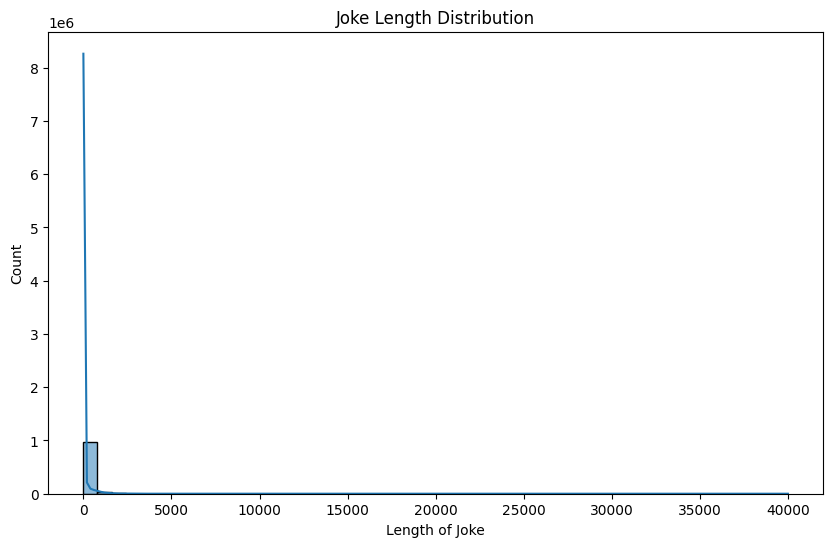

In [ ]:
# Plot joke length distribution
df['joke_length'] = df['selftext'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['joke_length'], bins=50, kde=True)
plt.title("Joke Length Distribution")
plt.xlabel("Length of Joke")
plt.show()

In [ ]:
df.selftext.value_counts()

,count
selftext,
[removed],232921
[deleted],188442
\[removed\],272
To get to the other side.,125
Dr. Dre,111
...,...
Deer balls... they’re always under a buck!,1
One says: ‘How do you drive this thing?,1
If you have to force it it’s probably s***,1


In [ ]:
unwanted_values = ['[removed]', '[deleted]', '\[removed\]', 'To get to the other side.']
df = df[~df['selftext'].isin(unwanted_values)].reset_index(drop=True)
print(df.head())

   type      id subreddit.id subreddit.name  subreddit.nsfw  created_utc  \
0  post  ftbp1i        2qh72          jokes           False   1585785543   
1  post  ftboup        2qh72          jokes           False   1585785522   
2  post  ftbopj        2qh72          jokes           False   1585785508   
3  post  ftbeb4        2qh72          jokes           False   1585784461   
4  post  ftbahg        2qh72          jokes           False   1585784081   

                                           permalink      domain  url  \
0  https://old.reddit.com/r/Jokes/comments/ftbp1i...  self.jokes  NaN   
1  https://old.reddit.com/r/Jokes/comments/ftboup...  self.jokes  NaN   
2  https://old.reddit.com/r/Jokes/comments/ftbopj...  self.jokes  NaN   
3  https://old.reddit.com/r/Jokes/comments/ftbeb4...  self.jokes  NaN   
4  https://old.reddit.com/r/Jokes/comments/ftbahg...  self.jokes  NaN   

                                            selftext  \
0  My corona is covered with foreskin so it is n

In [ ]:
df['merged_text'] = df['title'] + " " + df['selftext']
df = df[['merged_text', 'score']]

In [ ]:
df = df.dropna(subset=['merged_text'])
df = df[df['merged_text'].str.strip() != ""]

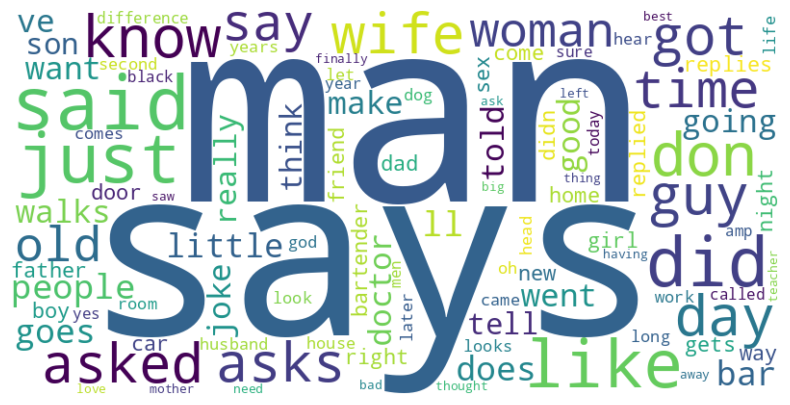

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

vectorizer = CountVectorizer(stop_words='english', max_features=100)
word_counts = vectorizer.fit_transform(df['merged_text'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).A1))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

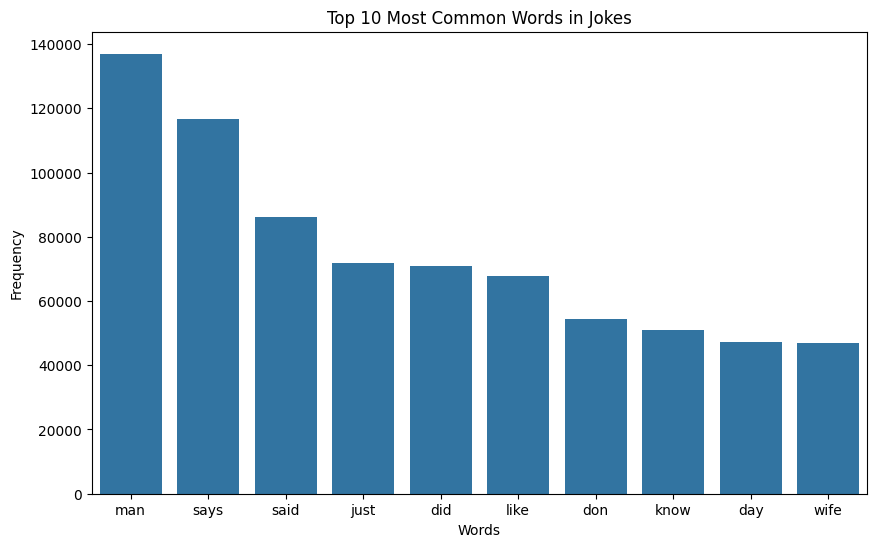

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Clean and tokenize jokes, remove stop words
words = " ".join(df['merged_text']).lower()
words = re.findall(r'\b\w+\b', words)
filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]

# Get most common words
common_words = Counter(filtered_words).most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 10 Most Common Words in Jokes")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

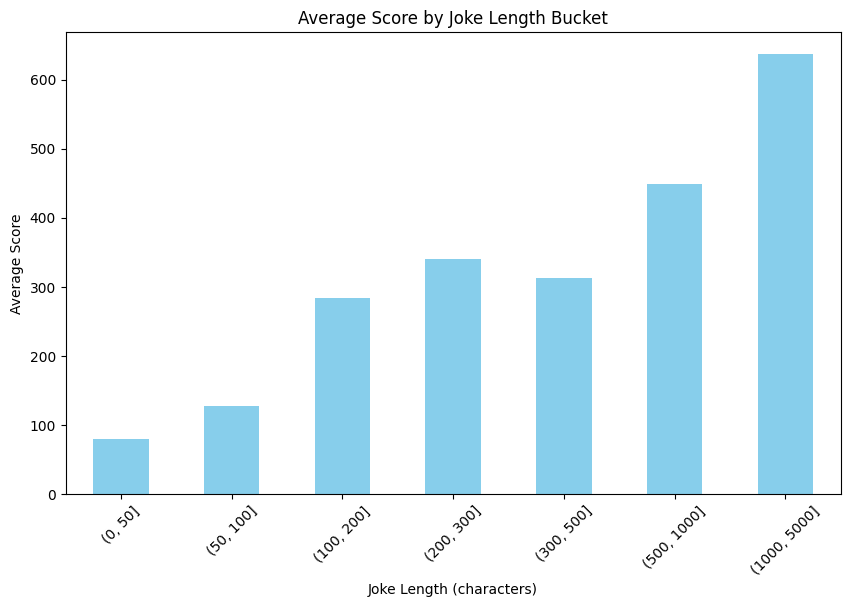

In [ ]:
df['length_bucket'] = pd.cut(df['merged_text'].str.len(), bins=[0, 50, 100, 200, 300, 500, 1000, 5000])
avg_scores = df.groupby('length_bucket')['score'].mean()

plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', color='skyblue')
plt.title("Average Score by Joke Length Bucket")
plt.xlabel("Joke Length (characters)")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

**DATA LABELING**

In [ ]:
!pip install transformers

In [ ]:
import torch

In [ ]:
from transformers import pipeline

# Initializing the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

In [ ]:
categories = ["children", "pun", "adult", "dark humor"]
df_subset = df.head(50000)

# Applying zero-shot classification to the subset of data
def classify_joke(joke):
    result = classifier(joke, categories, multi_label=True)
    return result["labels"][0]

In [ ]:
# Adding a new column for categories based on the model's prediction
df_subset['facebook_bart_classification'] = df_subset['merged_text'].apply(classify_joke)

In [ ]:
df_subset[['merged_text', 'facebook_bart_classification']].head(20)

,merged_text,facebook_bart_classification
0,I am soooo glad I'm not circumcised! My corona...,adult
1,Did you know Google now has a platform for rec...,pun
2,What is the difference between my wife and my ...,pun
3,What did the French man say to the attractive ...,pun
4,"Yo Mama Yo momma's so fat, that when she went ...",pun
5,"Why did the pilot turn his plane into pens, pe...",adult
6,On my 18th birthday my friend introduced me to...,adult
7,Which animal has the softest bite? “Gummy” bears,pun
8,April Fool..... Because nothing is funny any m...,pun
9,Want to know which user is gullible? Click her...,pun


In [ ]:
classifier = pipeline("zero-shot-classification", model="ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli", device=0)

In [ ]:
categories = ["children", "pun", "adult", "dark humor"]
def classify_joke(joke):
    result = classifier(joke, categories, multi_label=True)
    return result["labels"][0]

In [ ]:
# Adding a new column for categories based on the model's prediction
df_subset['roberta_classification'] = df_subset['merged_text'].apply(classify_joke)

In [ ]:
df_subset[['merged_text', 'roberta_classification']]

,merged_text,roberta_classification
0,I am soooo glad I'm not circumcised! My corona...,pun
1,Did you know Google now has a platform for rec...,pun
2,What is the difference between my wife and my ...,adult
3,What did the French man say to the attractive ...,pun
4,"Yo Mama Yo momma's so fat, that when she went ...",pun
...,...,...
55934,"This time, Jessica decided to take Bill out fo...",adult
55935,I have a bad habit of looking for right-angles...,pun
55936,"Today at the bank, an old lady asked me to che...",pun
55937,I have been to r/fallout . It not as toxic as ...,pun


In [ ]:
classifier = pipeline("zero-shot-classification", model="cross-encoder/nli-deberta-v3-base", device=0)

In [ ]:
categories = ["children", "pun", "adult", "dark humor"]
def classify_joke(joke):
    result = classifier(joke, categories, multi_label=True)
    return result["labels"][0]

In [ ]:
df_subset['catergory_cross_encoder'] = df_subset['merged_text'].apply(classify_joke)

In [ ]:
df_subset[['merged_text', 'category_cross_encoder']]

,merged_text,category_cross_encoder
0,I am soooo glad I'm not circumcised! My corona...,adult
1,Did you know Google now has a platform for rec...,adult
2,What is the difference between my wife and my ...,dark humor
3,What did the French man say to the attractive ...,pun
4,"Yo Mama Yo momma's so fat, that when she went ...",adult
...,...,...
55934,"This time, Jessica decided to take Bill out fo...",adult
55935,I have a bad habit of looking for right-angles...,adult
55936,"Today at the bank, an old lady asked me to che...",adult
55937,I have been to r/fallout . It not as toxic as ...,adult


In [ ]:
df_final = df_subset
df_final.to_csv('/content/df_final.csv', index=False)

In [ ]:
df_final = pd.read_csv("/content/df_final.csv")

In [ ]:
from collections import Counter
def majority_voting(row):
    categories = [
        row['category_cross_encoder'],
        row['facebook_bart_classification'],
        row['roberta_classification']
    ]
    return Counter(categories).most_common(1)[0][0]


df_final['final_category'] = df_final.apply(majority_voting, axis=1)


In [ ]:
df_final

,merged_text,score,category_cross_encoder,facebook_bart_classification,roberta_classification,final_category
0,I am soooo glad I'm not circumcised! My corona...,2.0,adult,adult,pun,adult
1,Did you know Google now has a platform for rec...,9.0,adult,pun,pun,pun
2,What is the difference between my wife and my ...,15.0,dark humor,pun,adult,dark humor
3,What did the French man say to the attractive ...,2.0,pun,pun,pun,pun
4,"Yo Mama Yo momma's so fat, that when she went ...",0.0,adult,pun,pun,pun
...,...,...,...,...,...,...
55934,"This time, Jessica decided to take Bill out fo...",0.0,adult,pun,adult,adult
55935,I have a bad habit of looking for right-angles...,2.0,adult,adult,pun,adult
55936,"Today at the bank, an old lady asked me to che...",16.0,adult,pun,pun,pun
55937,I have been to r/fallout . It not as toxic as ...,1.0,adult,pun,pun,pun


**WORKING WITH LABELLED DATASET**

In [ ]:
df_final.drop(['category_cross_encoder', 'facebook_bart_classification', 'roberta_classification'], axis = 1, inplace = True)

In [ ]:
df_final

,merged_text,score,final_category
0,I am soooo glad I'm not circumcised! My corona...,2.0,adult
1,Did you know Google now has a platform for rec...,9.0,pun
2,What is the difference between my wife and my ...,15.0,dark humor
3,What did the French man say to the attractive ...,2.0,pun
4,"Yo Mama Yo momma's so fat, that when she went ...",0.0,pun
...,...,...,...
55934,"This time, Jessica decided to take Bill out fo...",0.0,adult
55935,I have a bad habit of looking for right-angles...,2.0,adult
55936,"Today at the bank, an old lady asked me to che...",16.0,pun
55937,I have been to r/fallout . It not as toxic as ...,1.0,pun


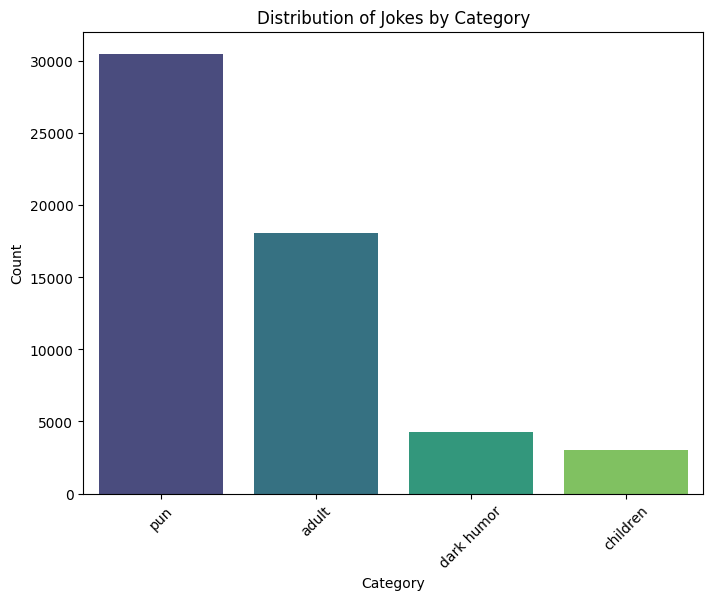

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final, x='final_category', order=df_final['final_category'].value_counts().index, palette="viridis")
plt.title("Distribution of Jokes by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


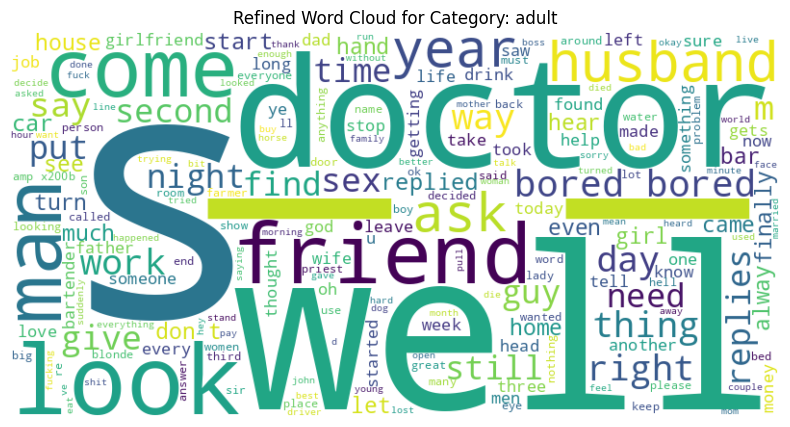

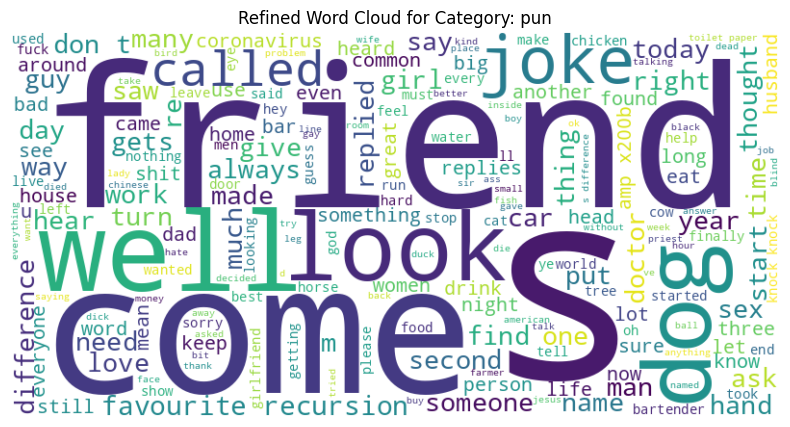

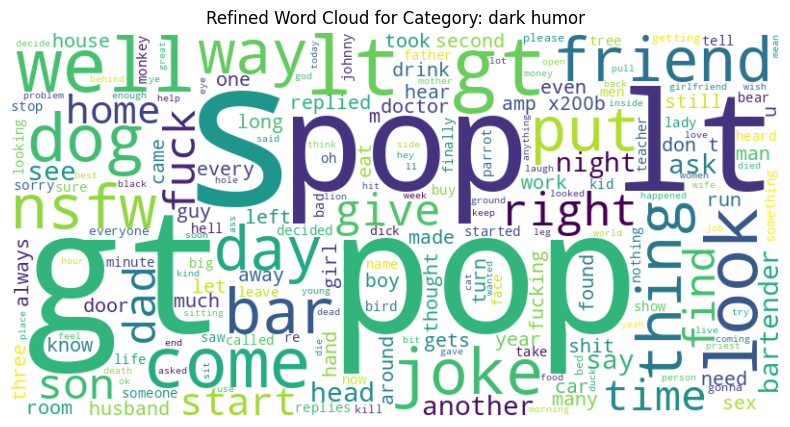

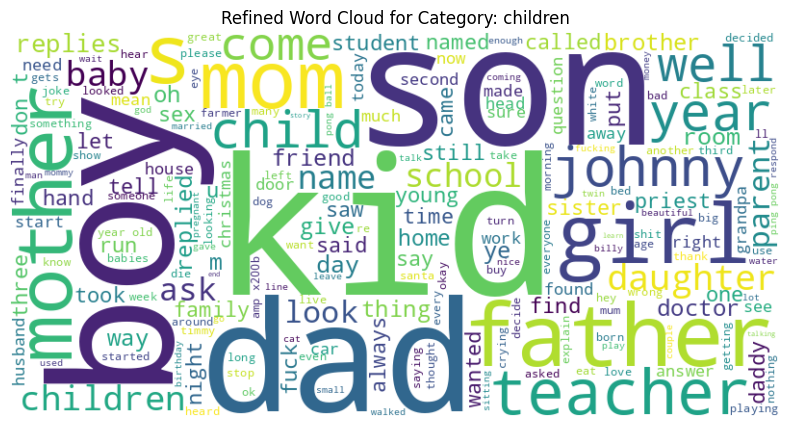

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
all_words = " ".join(df_final['merged_text']).lower().split()
filtered_all_words = [word for word in all_words if word not in stop_words]
common_words = [word for word, count in Counter(filtered_all_words).most_common(50)]

custom_stop_words = stop_words.union(set(common_words))

# Generating word clouds for each category
for category in df_final['final_category'].unique():
    jokes = " ".join(df_final[df_final['final_category'] == category]['merged_text']).lower()
    filtered_jokes = " ".join([word for word in jokes.split() if word not in custom_stop_words])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_jokes)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Refined Word Cloud for Category: {category}")
    plt.axis('off')
    plt.show()

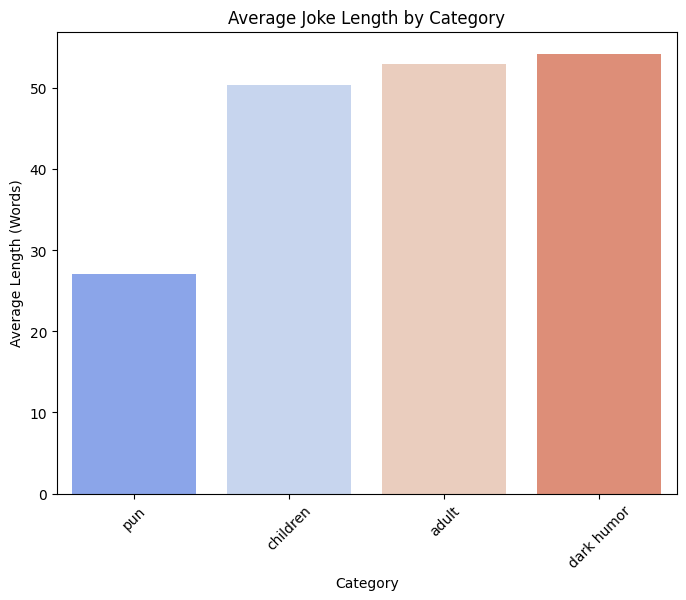

In [ ]:
df_final['joke_length'] = df_final['merged_text'].apply(lambda x: len(x.split()))
avg_length = df_final.groupby('final_category')['joke_length'].mean().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_length.index, y=avg_length.values, palette="coolwarm")
plt.title("Average Joke Length by Category")
plt.xlabel("Category")
plt.ylabel("Average Length (Words)")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


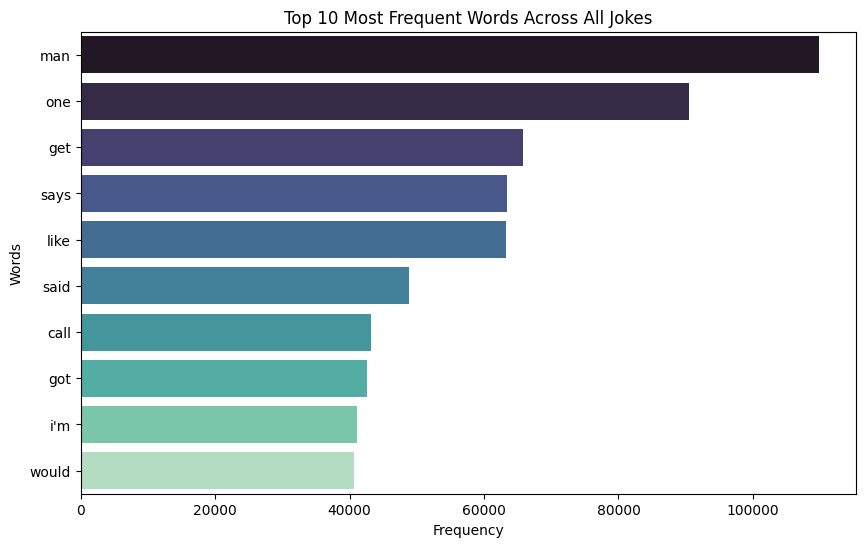

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
all_words = " ".join(df['merged_text']).lower().split()
filtered_words = [word for word in all_words if word not in stop_words]
top_words = Counter(filtered_words).most_common(10)

words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette="mako")
plt.title("Top 10 Most Frequent Words Across All Jokes")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_final['merged_text'])

# KMeans Clustering
n_clusters = df_final['final_category'].nunique()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_final['tfidf_cluster'] = kmeans.fit_predict(tfidf_matrix)

for cluster in range(n_clusters):
    print(f"\nCluster {cluster} - TF-IDF:")
    print(df_final[df_final['tfidf_cluster'] == cluster]['merged_text'].head(10))


Cluster 0 - TF-IDF:
0     I am soooo glad I'm not circumcised! My corona...
1     Did you know Google now has a platform for rec...
2     What is the difference between my wife and my ...
4     Yo Mama Yo momma's so fat, that when she went ...
5     Why did the pilot turn his plane into pens, pe...
6     On my 18th birthday my friend introduced me to...
7      Which animal has the softest bite? “Gummy” bears
8     April Fool..... Because nothing is funny any m...
9     Want to know which user is gullible? Click her...
10       How do you slow down a Greyhound? You feed it.
Name: merged_text, dtype: object

Cluster 1 - TF-IDF:
3     What did the French man say to the attractive ...
20    A very rich man was infatuated with General Cu...
22    How does a blind man know when he's done wipin...
39    The bartender asks “Why the non-linear structu...
46    Give a man a fish and he eats for a day. Teach...
49    How did the lady sheriff always catch the want...
52    Couple talking a walk A

In [ ]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np

tokenized_jokes = df_final['merged_text'].apply(lambda x: x.split())

w2v_model = Word2Vec(sentences=tokenized_jokes, vector_size=100, window=5, min_count=1, workers=4, seed=42)

def get_sentence_embedding(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

df_final['w2v_embeddings'] = tokenized_jokes.apply(lambda x: get_sentence_embedding(x, w2v_model))

sentence_embeddings = np.vstack(df_final['w2v_embeddings'].values)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_final['w2v_cluster'] = kmeans.fit_predict(sentence_embeddings)

# Displaying 10 jokes per cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster} - Word2Vec:")
    print(df_final[df_final['w2v_cluster'] == cluster]['merged_text'].head(10))


Cluster 0 - Word2Vec:
1     Did you know Google now has a platform for rec...
7      Which animal has the softest bite? “Gummy” bears
8     April Fool..... Because nothing is funny any m...
9     Want to know which user is gullible? Click her...
16    Tee Pee a House on, April Fool's, 2020 Wouldn’...
21    How do you know someone is feeling horny? They...
22    How does a blind man know when he's done wipin...
23    Cruise Ships are being denied ports of entry d...
30    Why did Sister Mary leave the Convent? She fou...
34    How does Popeye stop his penis going rusty? Ho...
Name: merged_text, dtype: object

Cluster 1 - Word2Vec:
10        How do you slow down a Greyhound? You feed it.
14     What do you call a boat full of dentists? A to...
25       What does a house wear for prom night? Address.
26     How do you make a waterbed more bouncy? Spring...
36     What do you call a young Mexican? A paragraph,...
50     What do you call a headless caveman, riding a ...
85     What is a ba

In [3]:
# Dimensionality reduction using t-SNE for Word2Vec embeddings
w2v_2d = tsne.fit_transform(sentence_embeddings)

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=w2v_2d[:, 0], y=w2v_2d[:, 1], hue=df_final['w2v_cluster'], palette='viridis', s=60)
plt.title('Word2Vec Clusters Visualization (t-SNE)', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title="Cluster", loc='best')
plt.show()